### Imports

In [7]:
import csv
import re
import glob
import datetime
from pathlib import Path
import pandas
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append(str(Path.cwd().parents[0]))
from functions import *

### Set Save File Name

In [8]:
save_path = Path.cwd() / "Plots"
if not save_path.exists():
    save_path.mkdir()

### Get the Data Paths

In [25]:
# Get the lists of file paths
data_paths = getDirectoryPaths(Path.cwd(), header="Select a Directory", verbose=True)

In [26]:
raw_dfs = []
for path in data_paths:
    raw_dfs.append(combineDataInFolder("csv", path))

### Set the Header of the DFs

In [27]:
# Transpose the dataframes
trans_dfs = [raw_dfs[ii].T for ii in range(len(raw_dfs))]
trans_dfs = raw_dfs
trans_dfs[0]

,Walltime,Step,Value,Walltime,Step,Value,Walltime,Step,Value,Walltime,...,Value,Walltime,Step,Value,Walltime,Step,Value,Walltime,Step,Value
0,1.643765e+09,484,-0.504571,1.643765e+09,97,-0.041824,1.643765e+09,568,-0.074483,1.643765e+09,...,-0.958093,1.643765e+09,419,-14.947123,1.643765e+09,425,-0.861233,1.643786e+09,291,-0.024540
1,1.643765e+09,1506,-0.761813,1.643765e+09,217,-0.045688,1.643765e+09,636,-0.068491,1.643765e+09,...,-0.990169,1.643765e+09,508,-12.817597,1.643765e+09,547,-0.741142,1.643786e+09,489,-0.025675
2,1.643765e+09,1896,-0.749793,1.643765e+09,362,-0.054950,1.643765e+09,948,-0.370337,1.643765e+09,...,-0.691458,1.643765e+09,757,-9.233809,1.643765e+09,857,-0.500082,1.643786e+09,578,-0.070266
3,1.643765e+09,3456,-0.297134,1.643765e+09,459,-0.048668,1.643765e+09,1031,-0.354624,1.643765e+09,...,-0.637058,1.643765e+09,838,-8.465771,1.643765e+09,1000,-0.509018,1.643786e+09,742,-0.098625
4,1.643765e+09,3639,-0.293820,1.643765e+09,563,-0.047188,1.643765e+09,1188,-0.313694,1.643765e+09,...,-0.572036,1.643765e+09,1073,-7.263841,1.643765e+09,1170,-0.536182,1.643786e+09,950,-0.194177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.643772e+09,498082,0.000174,1.643772e+09,499498,-0.133524,1.643772e+09,498265,-0.181294,1.643772e+09,...,-0.064527,1.643772e+09,498157,-0.101808,1.643772e+09,499049,-0.064515,1.643793e+09,499055,-0.093877
996,1.643772e+09,499093,0.000107,1.643772e+09,499539,-0.125534,1.643772e+09,498893,-0.165382,1.643772e+09,...,-0.072521,1.643772e+09,498588,-0.109753,1.643772e+09,499464,-0.064521,1.643793e+09,499521,-0.093906
997,1.643772e+09,499289,0.000174,1.643772e+09,499578,-0.117592,1.643772e+09,499322,-0.173309,1.643772e+09,...,-0.064542,1.643772e+09,499093,-0.101763,1.643772e+09,499536,-0.040578,1.643793e+09,499599,-0.093854
998,1.643772e+09,499562,0.000542,1.643772e+09,499616,-0.117595,1.643772e+09,499361,-0.165350,1.643772e+09,...,-0.064538,1.643772e+09,499133,-0.093812,1.643772e+09,499972,-0.048554,1.643793e+09,499635,-0.093857


In [28]:
# Remove unwanted columns:
data_values = ["Value"]

plot_dfs_clean = []
for df in trans_dfs:
    drop_names = []
    for column in df:
        if not any(data_values in column for data_values in data_values):
            drop_names.append(str(column))
    plot_dfs_clean.append(df.drop(columns=drop_names))

plot_dfs_clean[0]

,Value,Value,Value,Value,Value,Value,Value,Value,Value,Value
0,-0.504571,-0.041824,-0.074483,-0.361946,-0.068747,-0.056427,-0.958093,-14.947123,-0.861233,-0.024540
1,-0.761813,-0.045688,-0.068491,-0.335020,-0.071378,-0.055578,-0.990169,-12.817597,-0.741142,-0.025675
2,-0.749793,-0.054950,-0.370337,-0.241933,-0.060167,-0.403935,-0.691458,-9.233809,-0.500082,-0.070266
3,-0.297134,-0.048668,-0.354624,-0.223248,-0.080650,-0.375174,-0.637058,-8.465771,-0.509018,-0.098625
4,-0.293820,-0.047188,-0.313694,-0.198415,-0.084809,-0.330332,-0.572036,-7.263841,-0.536182,-0.194177
...,...,...,...,...,...,...,...,...,...,...
995,0.000174,-0.133524,-0.181294,-0.069859,-0.125565,-0.117997,-0.064527,-0.101808,-0.064515,-0.093877
996,0.000107,-0.125534,-0.165382,-0.069827,-0.101658,-0.117983,-0.072521,-0.109753,-0.064521,-0.093906
997,0.000174,-0.117592,-0.173309,-0.077758,-0.109631,-0.109988,-0.064542,-0.101763,-0.040578,-0.093854
998,0.000542,-0.117595,-0.165350,-0.085671,-0.125567,-0.102041,-0.064538,-0.093812,-0.048554,-0.093857


In [29]:
# get the avereage of the data column wise
plot_dfs_avg = []
for df in plot_dfs_clean:
    plot_dfs_avg.append(df.mean(axis=1))

plot_dfs_avg[0]

0     -1.789899
1     -1.591255
2     -1.237673
3     -1.108997
4     -0.983449
         ...   
995   -0.095279
996   -0.092098
997   -0.088884
998   -0.089644
999   -0.084873
Length: 1000, dtype: float64

### Plot Average/STD Timeseries

In [30]:
X_EFF_MEAN = plot_dfs_clean[0].index
Y_EFF_MEAN, Y_EFF_STD = dfAverageStd(plot_dfs_clean[0])

X_HEI_MEAN = plot_dfs_clean[1].index
Y_HEI_MEAN, Y_HEI_STD = dfAverageStd(plot_dfs_clean[1])

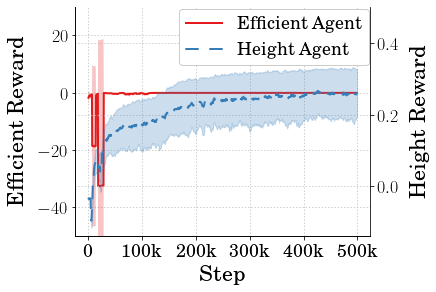

In [35]:
fig = plt.figure(figsize=(6,4))
ax1 = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax1.get_ymajorticklabels(),fontsize=18)
plt.setp(ax1.get_xmajorticklabels(),fontsize=18)

# Remove the top and right border, they are not needed
ax1.spines['right'].set_visible(True)
ax1.spines['right'].set_color("black")
# ax1.spines['top'].set_color('none')

# Define the positions of the axes tick marks
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

# Manually set the x-axis limits, if necessary
# plt.xlim(0,5)

# Turn on the plot grid and set appropriate linestyle and color
ax1.grid(True, linestyle=':', color='0.75')
ax1.set_axisbelow(True)

# Define the X and Y1 axis labels
ax1.set_xlabel('Step', fontsize=22, weight='bold', labelpad=5)
ax1.set_ylabel(r'Efficient Reward', fontsize=22, weight='bold', labelpad=10)

# Plots gain used on input to tracking of Surge
ax1.plot(X_EFF_MEAN, Y_EFF_MEAN, linewidth=2, linestyle='-', label="Efficient Agent")
ax1.fill_between(X_EFF_MEAN, Y_EFF_MEAN-(Y_EFF_STD/2), Y_EFF_MEAN+(Y_EFF_STD)/2, alpha=0.25)
# ax1.plot(x, y1, linewidth=2, linestyle='-', label=r'$y_1$', )

# Manually set the y1-axes limits, if necessary
ax1.set_ylim(bottom=-50, top=30)

# Set x-axis tick marks
label = ["0", "100k", "200k", "300k", "400k", "500k"]
ax1.set_xticks([0, 200, 400, 600, 800, 1000])
ax1.set_xticklabels(label, fontsize=18, weight='bold')

# Set up the 2nd Y-axis, using the same x-axis as the first
ax2 = ax1.twinx()

# Remove the top border, it's not needed
# ax2.spines['top'].set_color('none')

# Turn on the plot grid and set appropriate linestyle and color
ax2.grid(True, linestyle=':', color='0.75')
ax2.set_axisbelow(True) 

# Change the y2 axis units font
plt.setp(ax2.get_ymajorticklabels(), fontsize=18)

# Define the Y2 axis labels
ax2.set_ylabel(r'Height Reward', fontsize=22, weight='bold', labelpad=10)

ax2.plot(X_HEI_MEAN, Y_HEI_MEAN, linewidth=2, linestyle='--', color = '#377eb8', label="Height Agent")
ax2.fill_between(X_HEI_MEAN, Y_HEI_MEAN-(Y_HEI_STD/2), Y_HEI_MEAN+(Y_HEI_STD)/2, color = '#377eb8', alpha=0.25)
# ax2.plot(x, y2, linewidth=2, linestyle='--', color = '#377eb8', label=r'$y_2$')

# Manually set the y2-axes limits, if necessary
ax2.set_ylim(bottom=None, top=0.5)

# Create the legend, then fix the fontsize
# ask matplotlib for the plotted objects and their labels
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
leg = ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
fill = "One"
filename = f'RewVsTime{fill}.svg'
path = save_path / filename
plt.savefig(path, transparent=True)
filename = f'RewVsTime{fill}.png'
path = save_path / filename
plt.savefig(path, transparent=True)
plt.show()